In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("income_evaluation.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.shape

(32561, 15)

In [7]:
df[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [9]:
#df[' marital-status'].unique()
df[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [11]:
col_names = df.columns
col_names = [v.strip() for v in col_names] #remove extra spaces
col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [12]:
df.columns = col_names
df.drop(columns = 'fnlwgt', inplace=True)

In [13]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [15]:
bins = [16,24,64,90]
labels=['young','adult','old']
df['age_types'] = pd.cut(df['age'], bins=bins,labels=labels)
df['income_num'] = np.where(df['income'] == " >50K",1,0).astype('int16')

In [16]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


In [19]:
df.loc[df['workclass']=='?', 'workclass']= np.NaN
df.loc[df['occupation']=='?', 'occupation']= np.NaN
df.loc[df['native-country']=='?', 'native_country']= np.NaN

In [20]:
#remove any columns with NaN value
df = df.dropna(axis=1)
df.shape

(32561, 16)

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [24]:
#encodes categorical columns in the DataFrame df into numeric values
from sklearn.preprocessing import LabelEncoder
def label_encoder(a):
    le = LabelEncoder()
    df.loc[:, a] = le.fit_transform(df[a])
label_list = ['workclass', 'education','marital-status',
       'occupation', 'relationship', 'race', 'sex','native-country', 'income']
for i in label_list:
    label_encoder(i)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
scaler.fit(df.drop(['income','age_types','income_num'],axis=1))

MinMaxScaler()

In [27]:
scaled_features = scaler.transform(df.drop(['income','age_types','income_num'],axis=1))

In [28]:
columns=['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country']

In [29]:
df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.875,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220
1,0.452055,0.750,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220
2,0.287671,0.500,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220
3,0.493151,0.500,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220
4,0.150685,0.500,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951


In [30]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

X = df_scaled
y= df.income

# Implementing Oversampling for Handling Imbalanced data
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=101,shuffle=True)
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.8301930916413705
Test Score: 0.8332987336516504


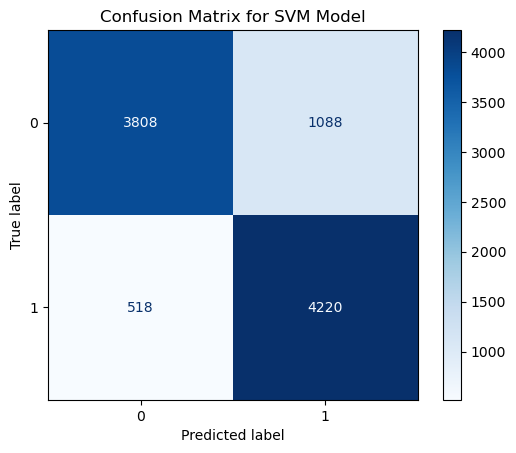

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict on the test set
y_pred = svc.predict(X_test)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM Model')
plt.show()

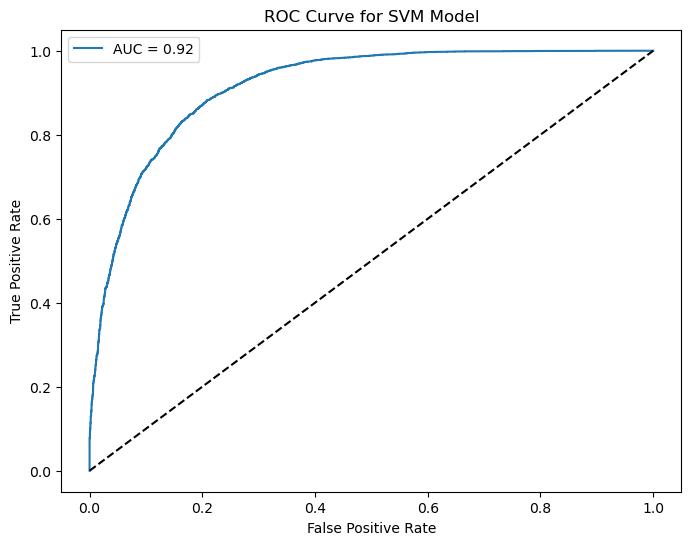

In [32]:
#ROC curve and AUC score
#The ROC curve shows the trade-off between the true positive rate (sensitivity)
#and the false positive rate (1-specificity), and the AUC score summarizes this as a single value.
from sklearn.metrics import roc_curve, auc

# Get the decision function scores for the test set
y_pred_proba = svc.decision_function(X_test)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend()
plt.show()

An AUC of 0.92 means that there’s a 92% chance the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.
The ROC curve shows that the SVM model has a high TPR with a relatively low FPR across various thresholds, indicating it’s effective at distinguishing between the two classes.

/Users/rupalimohapatra/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


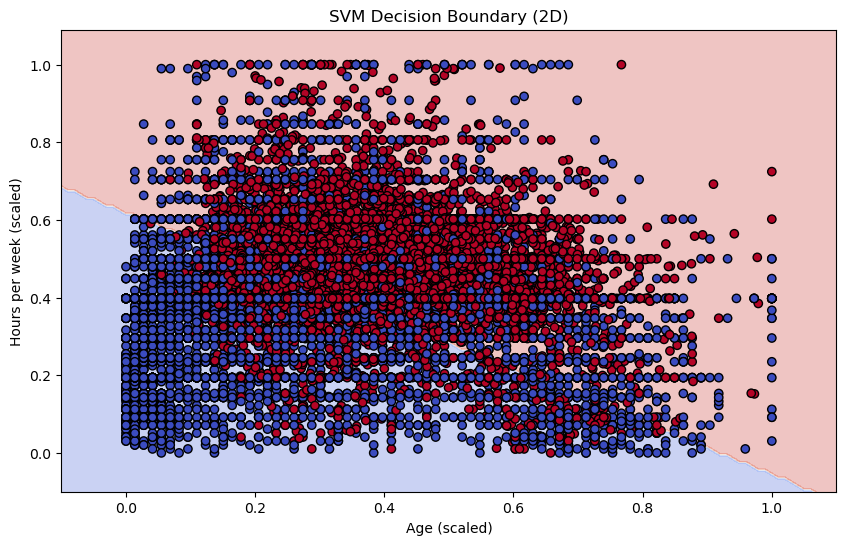

In [35]:
#Decision Boundary Visualization
# Select two features for visualization (assuming 'age' and 'hours_per_week' in scaled form)
X_vis = X_train[['age', 'hours_per_week']]
y_vis = y_train

# Initialize a new SVM model trained only on these two features
svc_vis = SVC(kernel='linear', random_state=101)
svc_vis.fit(X_vis, y_vis)

# Plot decision boundary
plt.figure(figsize=(10, 6))

# Create a mesh to plot decision boundary
x_min, x_max = X_vis['age'].min() - 0.1, X_vis['age'].max() + 0.1
y_min, y_max = X_vis['hours_per_week'].min() - 0.1, X_vis['hours_per_week'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on mesh points
Z = svc_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis['age'], X_vis['hours_per_week'], c=y_vis, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Age (scaled)')
plt.ylabel('Hours per week (scaled)')
plt.title('SVM Decision Boundary (2D)')
plt.show()